# Palmer Penguins

***
![Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png) 

This notebook contains my analysis of the famous palmer penguins dataset.

The data set is available [on GitHub](https://allisonhorst.github.io/palmerpenguins/) and the raw data is available [here](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv)

**Author: Brianne McGrath**

# Imports 

***

We use pandas for the DataFrame data structure. 
We use seaborn for data visualisation.
We use matplotlib for for more in-depth visualisation. 

It allows us to investigate CSV files, among other features.

In [37]:
#Importing Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

***

Load the palmer penguins data set from a URL.

In [38]:
#Loading the penguin data set
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it. 

In [39]:
#Let's have a look 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [40]:
#Look at the first row
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [41]:
#Showing dataset information. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [42]:
#Showing summary statistics
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [43]:
#Sex of the penguins
df["sex"]

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [44]:
#Count the number of penguins of each sex.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [45]:
#Frequency Table
df[["species", "island", "sex"]].value_counts().reset_index(name="count")

,species,island,sex,count
0,Gentoo,Biscoe,MALE,61
1,Gentoo,Biscoe,FEMALE,58
2,Chinstrap,Dream,FEMALE,34
3,Chinstrap,Dream,MALE,34
4,Adelie,Dream,MALE,28
5,Adelie,Dream,FEMALE,27
6,Adelie,Torgersen,FEMALE,24
7,Adelie,Torgersen,MALE,23
8,Adelie,Biscoe,FEMALE,22
9,Adelie,Biscoe,MALE,22


# Analysis:

***

Types of Variables: 
From our brief review of the dataset we can see two types of variables that will help our analysis:
- **Numberic:** Bill Length, Bill Depth, Flipper Length and Body Mass. These measurements offer qualitative insights into each penguin's characteristics. 
- **Categorical:** Species and Sex. With three distinct species and two sexes, these categorical attributes allow for comprehensive analysis and comparison across different groups of penguins. 

We will focus on these two types of variables. The numeric values offer a wealth of information, providing detatiles insights into the dataset. With the support of the categorical variables we can dissect further based on sex and species. Using these should offer valuable insights throughout our analysis. 

***

### Bill Length vs Bill Depth:

Let's see if there is any correlation between Bill Length and Bill Depth:

We can see from the below graphs - the negative slope of the regression line indicates a negative correlation, suggesting that as bill length increases, bill depth tends to decrease. 

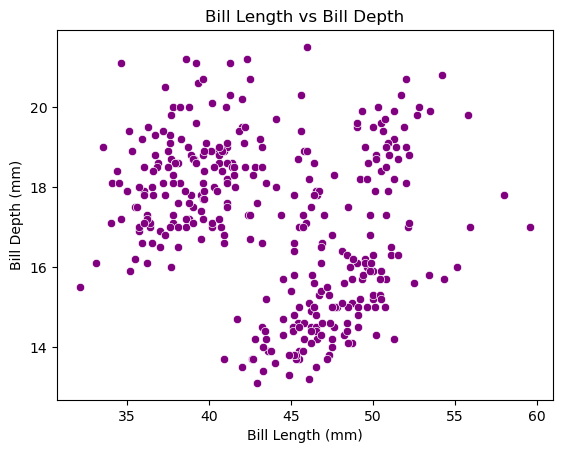

In [46]:
#Scatter plot for bill length and depth - to assess if there is a correlation between the two. 
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='purple')
plt.title('Bill Length vs Bill Depth')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

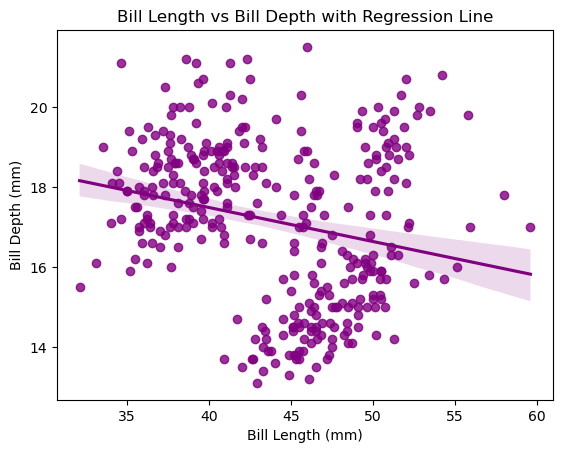

In [47]:
#Adding regression line for the same variables. 
sns.regplot(x='bill_length_mm', y='bill_depth_mm', data=df, color='purple')
plt.title('Bill Length vs Bill Depth with Regression Line')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

The scattered spread of points around the regression line implies a weaker correlation. This observation prompts us to consider whether including all penguin species contributes to this variability. Let's examine the relationship separately for each species.This shows us that there is in fact a positive correlation between Bill Depth and Bill Length, as we looked at each species. As the Bill Length increase so does the Bill Depth. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


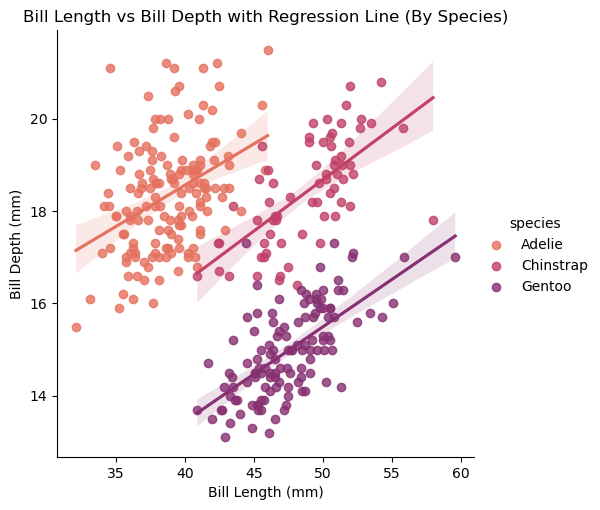

In [48]:
# Scatter plot with regression line separated by species
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', data=df, hue='species', palette='flare')
plt.title('Bill Length vs Bill Depth with Regression Line (By Species)')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Histogram

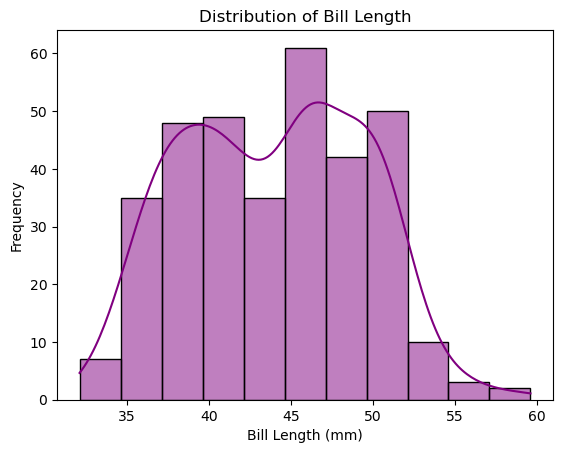

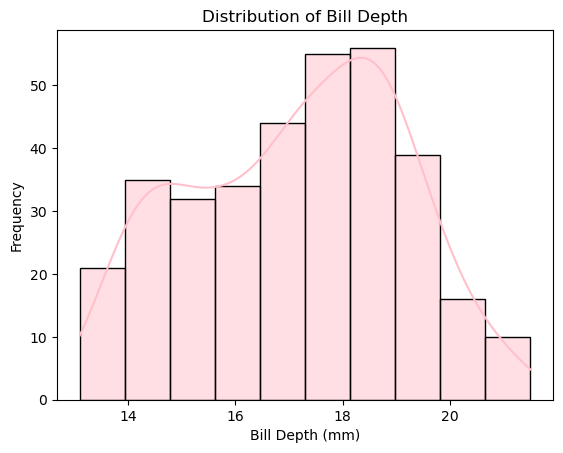

In [49]:
# Histograms for 'bill_length_mm' and 'bill_depth_mm'
sns.histplot(df['bill_length_mm'], kde=True, color='purple')
plt.title('Distribution of Bill Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df['bill_depth_mm'], kde=True, color='pink')
plt.title('Distribution of Bill Depth')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Frequency')
plt.show()

** Analysis of the Histograms ** 

All species included - need to see if there is a way to display multiple histograms for each species. Similar to what we did for the scatter plot - FacetGrid? Remove above ones? Or show the process of reviewing above initially and then releasing that we have to look at it per species? Maybe more clear and concise to look per species from the beginning and explain rationale. 

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


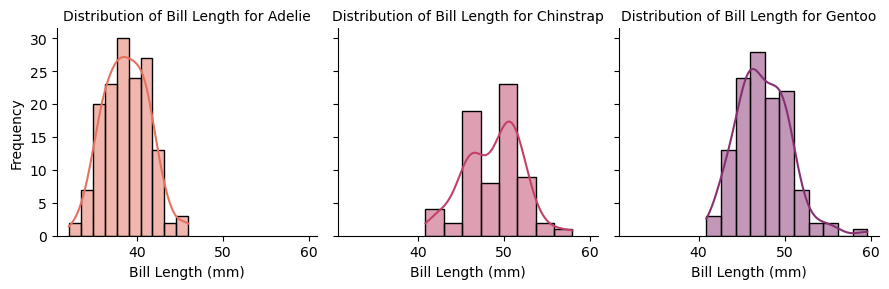

c:\Users\brian\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


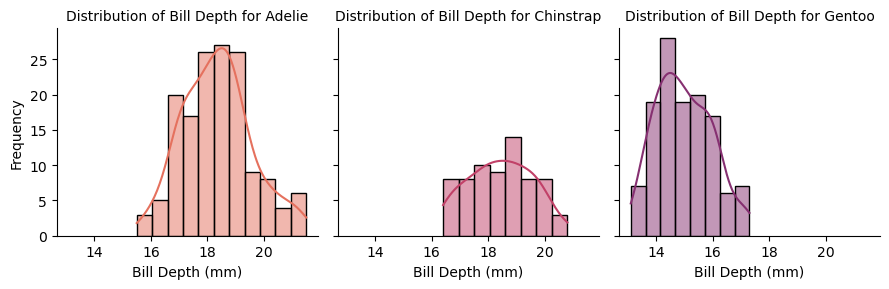

In [50]:
# Create separate histograms for 'bill_length_mm' by species
sns.FacetGrid(df, col="species", hue="species", palette="flare").map(sns.histplot, "bill_length_mm", kde=True).set_titles("Distribution of Bill Length for {col_name}").set_axis_labels("Bill Length (mm)", "Frequency")
plt.show()

# Create separate histograms for 'bill_depth_mm' by species
sns.FacetGrid(df, col="species", hue="species", palette="flare").map(sns.histplot, "bill_depth_mm", kde=True).set_titles("Distribution of Bill Depth for {col_name}").set_axis_labels("Bill Depth (mm)", "Frequency")
plt.show()

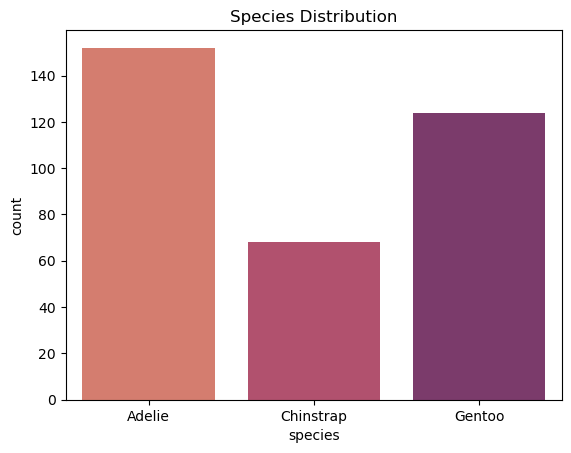

In [51]:
#Display a Bar Chart of Species Distribution.
sns.countplot(x='species', data=df, palette='flare')
plt.title('Species Distribution')
plt.show()

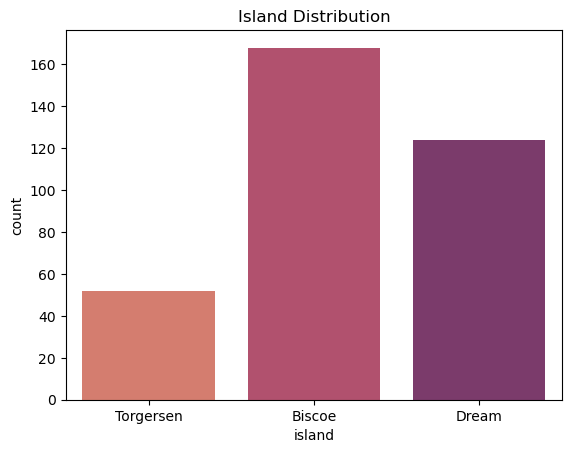

In [52]:
#Display a Bar Chart of Island Distribution. 
sns.countplot(x='island', data=df, palette='flare')
plt.title('Island Distribution')
plt.show()

In [53]:
#Pivot table for characteristics across males and females
sex_pivot = df.pivot_table(index='sex', values=['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm'], aggfunc='mean')
print("\nPivot Table for Characteristics Across Males and Females:")
print(sex_pivot)


Pivot Table for Characteristics Across Males and Females:
        bill_depth_mm  bill_length_mm  body_mass_g  flipper_length_mm
sex                                                                  
FEMALE      16.425455       42.096970  3862.272727         197.363636
MALE        17.891071       45.854762  4545.684524         204.505952


# Observations: 

Based on the information above, males tend to have larger recordings for each of their features compared to females. Let's look and see if there is any correlation between these varaibles within each group. We'll calculate the correlation coefficient and visualise using a heatmap. 


Correlation coefficients for Males:
                   bill_depth_mm  bill_length_mm  body_mass_g  \
bill_depth_mm           1.000000       -0.395294    -0.755492   
bill_length_mm         -0.395294        1.000000     0.476761   
body_mass_g            -0.755492        0.476761     1.000000   
flipper_length_mm      -0.716201        0.662654     0.865499   

                   flipper_length_mm  
bill_depth_mm              -0.716201  
bill_length_mm              0.662654  
body_mass_g                 0.865499  
flipper_length_mm           1.000000  

Correlation coefficients for Females:
                   bill_depth_mm  bill_length_mm  body_mass_g  \
bill_depth_mm           1.000000       -0.426380    -0.747770   
bill_length_mm         -0.426380        1.000000     0.581295   
body_mass_g            -0.747770        0.581295     1.000000   
flipper_length_mm      -0.794167        0.571474     0.884825   

                   flipper_length_mm  
bill_depth_mm              -0.794167  

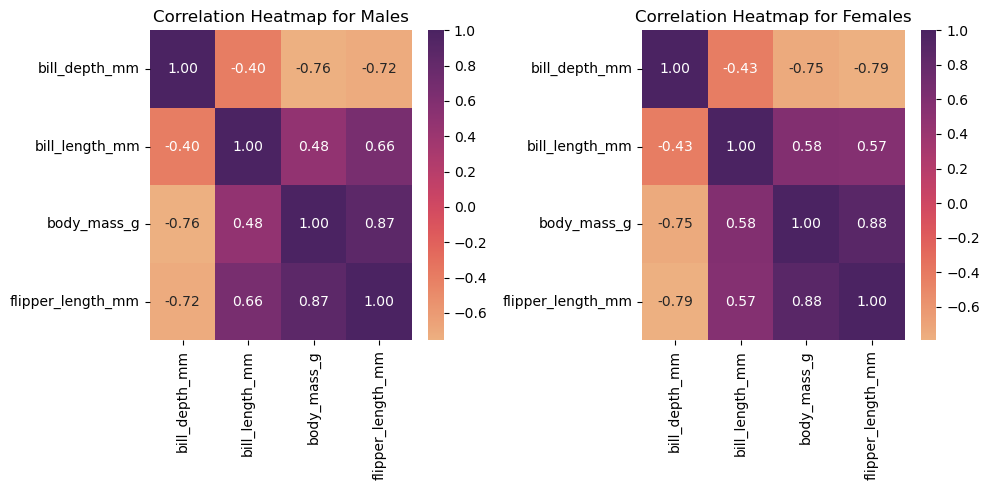

In [54]:
# Calculate correlation coefficients for males
male_correlation = df[df['sex'] == 'MALE'][['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm']].corr()

# Calculate correlation coefficients for females
female_correlation = df[df['sex'] == 'FEMALE'][['bill_depth_mm', 'bill_length_mm', 'body_mass_g', 'flipper_length_mm']].corr()

# Displaying correlation coefficients
print("\nCorrelation coefficients for Males:")
print(male_correlation)

print("\nCorrelation coefficients for Females:")
print(female_correlation)

# Visualize correlations using heatmaps with "flare" color palette
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(male_correlation, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation Heatmap for Males')

plt.subplot(1, 2, 2)
sns.heatmap(female_correlation, annot=True, cmap='flare', fmt='.2f')
plt.title('Correlation Heatmap for Females')

plt.tight_layout()
plt.show()

### Observations: 
#### Males:
1. Bill Depth vs Body Mass: There is a strong negative correlation between bill depth and body mass (-0.76), which implies penguins with deeper bills tend to have a lower body mass.
2. Bill Depth vs Flipper Length: Similarily, there is a strong negative correlation between bill depth and filpper length (-0.72), which implies penguins with deeper bills tend to have shorter flipper length. 
3. Bill Length vs Body Mass: 
4. Bill Mass vs Fillper Length:

(FINISH OBSERVATIONS AND DO THE SAME FOR FEMALES)

TO DO: 
Go back and review the project requirements - may be going to broad with analysis:
Revert Back to this on next session: 


Tasks (40%)
Create a GitHub repository with a README.md and a .gitignore. Add a Jupyter notebook called penguins.ipynb and add a title to it.
Find the palmerpenguins data set online and load it into your Jupyter notebook. In your notebook, give an overview of the data set and the variables it contains.
Suggest the types of variables that should be used to model the variables in the data set in Python, explaining your rationale.
Create a bar chart of an appropriate variable in the data set. Then create a histogram of an appropriate variable in the data set.


Project (40%)
Select two variables from the data set and provide an analysis of how correlated they are.

Presentational Component (20%)
Ensure your repository is tidy, with no unnecessary items. Ensure your README.md and .gitignore files are appropriate. Make sure your notebook contains a single cohesive narrative about the data set.

***

### End